In [113]:
# import libraries
import pandas as pd #for data manipulation and analysis
import numpy as np #for numerical operations
import sklearn
from sklearn.model_selection import train_test_split #to split the dataset
from sklearn.linear_model import LinearRegression #a simple regression model
from sklearn.metrics import root_mean_squared_error, r2_score #for model evaluation
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

sns.set_style('ticks')

pd.set_option('display.max_columns', None)

%matplotlib inline

In [95]:
# import train
train = pd.read_csv (r"C:\Users\Arya\Downloads\AmesHousing.csv")

In [96]:
#EXPLORATORY DATA ANALYSIS

In [97]:
# make columns lowercase and remove spaces
train.columns = train.columns.str.lower()
train.columns = train.columns.str.replace(' ', '')

print(train.columns)

Index(['order', 'pid', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea',
       'street', 'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt',
       'yearremod/add', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd',
       'masvnrtype', 'masvnrarea', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 

In [98]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order          2930 non-null   int64  
 1   pid            2930 non-null   int64  
 2   mssubclass     2930 non-null   int64  
 3   mszoning       2930 non-null   object 
 4   lotfrontage    2440 non-null   float64
 5   lotarea        2930 non-null   int64  
 6   street         2930 non-null   object 
 7   alley          198 non-null    object 
 8   lotshape       2930 non-null   object 
 9   landcontour    2930 non-null   object 
 10  utilities      2930 non-null   object 
 11  lotconfig      2930 non-null   object 
 12  landslope      2930 non-null   object 
 13  neighborhood   2930 non-null   object 
 14  condition1     2930 non-null   object 
 15  condition2     2930 non-null   object 
 16  bldgtype       2930 non-null   object 
 17  housestyle     2930 non-null   object 
 18  overallq

In [99]:
train.sample(5)

,order,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
679,680,535451250,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1.5Fin,5,4,1950,1982,Gable,CompShg,VinylSd,Wd Sdng,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,180.0,BLQ,352.0,676.0,1208.0,GasA,Gd,Y,FuseA,1136,768,0,1904,1.0,0.0,1,1,3,1,TA,7,Min1,0,NaN,Attchd,1950.0,Unf,1.0,240.0,TA,TA,Y,0,0,168,0,0,0,NaN,GdPrv,NaN,0,5,2009,WD,Normal,138000
1895,1896,534425015,20,RL,NaN,22002,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1959,1991,Gable,CompShg,MetalSd,MetalSd,BrkFace,136.0,TA,Gd,CBlock,TA,TA,Mn,ALQ,1386.0,Unf,0.0,206.0,1592.0,GasA,Gd,Y,SBrkr,1652,0,0,1652,1.0,0.0,1,1,3,1,Gd,6,Typ,1,Gd,Attchd,1959.0,RFn,2.0,510.0,TA,TA,Y,0,0,0,0,201,0,NaN,NaN,NaN,0,7,2007,WD,Normal,200000
593,594,534200030,20,RL,62.0,7130,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1967,1967,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,PConc,TA,TA,No,BLQ,648.0,Unf,0.0,216.0,864.0,GasA,TA,Y,SBrkr,864,0,0,864,0.0,1.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1967.0,Fin,1.0,312.0,TA,TA,Y,0,0,0,0,0,0,NaN,GdPrv,NaN,0,6,2009,WD,Normal,130000
45,46,528175010,120,RL,44.0,6371,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,7,5,2009,2010,Gable,CompShg,VinylSd,VinylSd,Stone,128.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,733.0,Unf,0.0,625.0,1358.0,GasA,Ex,Y,SBrkr,1358,0,0,1358,1.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2010.0,RFn,2.0,484.0,TA,TA,Y,192,35,0,0,0,0,NaN,NaN,NaN,0,6,2010,New,Partial,224000
1918,1919,535151110,20,RL,60.0,8250,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1963,1963,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,288.0,Unf,0.0,765.0,1053.0,GasA,Gd,Y,SBrkr,1053,0,0,1053,1.0,0.0,1,0,3,1,Gd,6,Typ,0,NaN,2Types,1994.0,RFn,2.0,692.0,TA,TA,Y,240,0,0,0,109,0,NaN,NaN,NaN,0,7,2007,WD,Normal,142100


In [100]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
order,2930.0,1.465500e+03,8.459625e+02,1.0,7.332500e+02,1465.5,2.197750e+03,2.930000e+03
pid,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,535453620.0,9.071811e+08,1.007100e+09
mssubclass,2930.0,5.738737e+01,4.263802e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
lotfrontage,2440.0,6.922459e+01,2.336533e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
lotarea,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9436.5,1.155525e+04,2.152450e+05
overallqual,2930.0,6.094881e+00,1.411026e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
overallcond,2930.0,5.563140e+00,1.111537e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
yearbuilt,2930.0,1.971356e+03,3.024536e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
yearremod/add,2930.0,1.984267e+03,2.086029e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
masvnrarea,2907.0,1.018968e+02,1.791126e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03


In [ ]:
"""
House Features:

Living Area (grlivarea):
Average: 1499 sq. ft.
Standard Deviation: 500 sq. ft.
Smallest house: 334 sq. ft.
Largest house: 5642 sq. ft.

Basement Area (totalbsmtsf) (for houses with basements):

Average: 1058 sq. ft.
Standard Deviation: 449 sq. ft.
Smallest basement: 0 sq. ft. (no basement)
Largest basement: 6110 sq. ft.

Garage Area (garagearea):

Average: 474 sq. ft.
Standard Deviation: 216 sq. ft.
Smallest garage: 0 sq. ft. (no garage)
Largest garage: 1418 sq. ft.

Number of Rooms (totrmsabvgrd):

Average: 6.43 rooms
Smallest house: 2 rooms
Largest house: 15 rooms

Sale Price (saleprice):

Average: $181,470
Standard Deviation: $7,926
Lowest price: $12,789
Highest price: $611,657
This summary provides an overview of the central tendencies and variability in house sizes, room counts, and prices within the dataset."""

In [ ]:
#Clean the data, handle missing values

In [101]:
# print count of nulls for columns containing nulls
nulldf = pd.DataFrame(train.isnull().sum(), columns = ['nullcount'])
nulldf = nulldf[nulldf['nullcount'] != 0]
print(nulldf.shape)
nulldf

(27, 1)


,nullcount
lotfrontage,490
alley,2732
masvnrtype,1775
masvnrarea,23
bsmtqual,80
bsmtcond,80
bsmtexposure,83
bsmtfintype1,80
bsmtfinsf1,1
bsmtfintype2,81


In [ ]:
#explore the data correlation with sale price to decide which columns/features to choose to go forward with

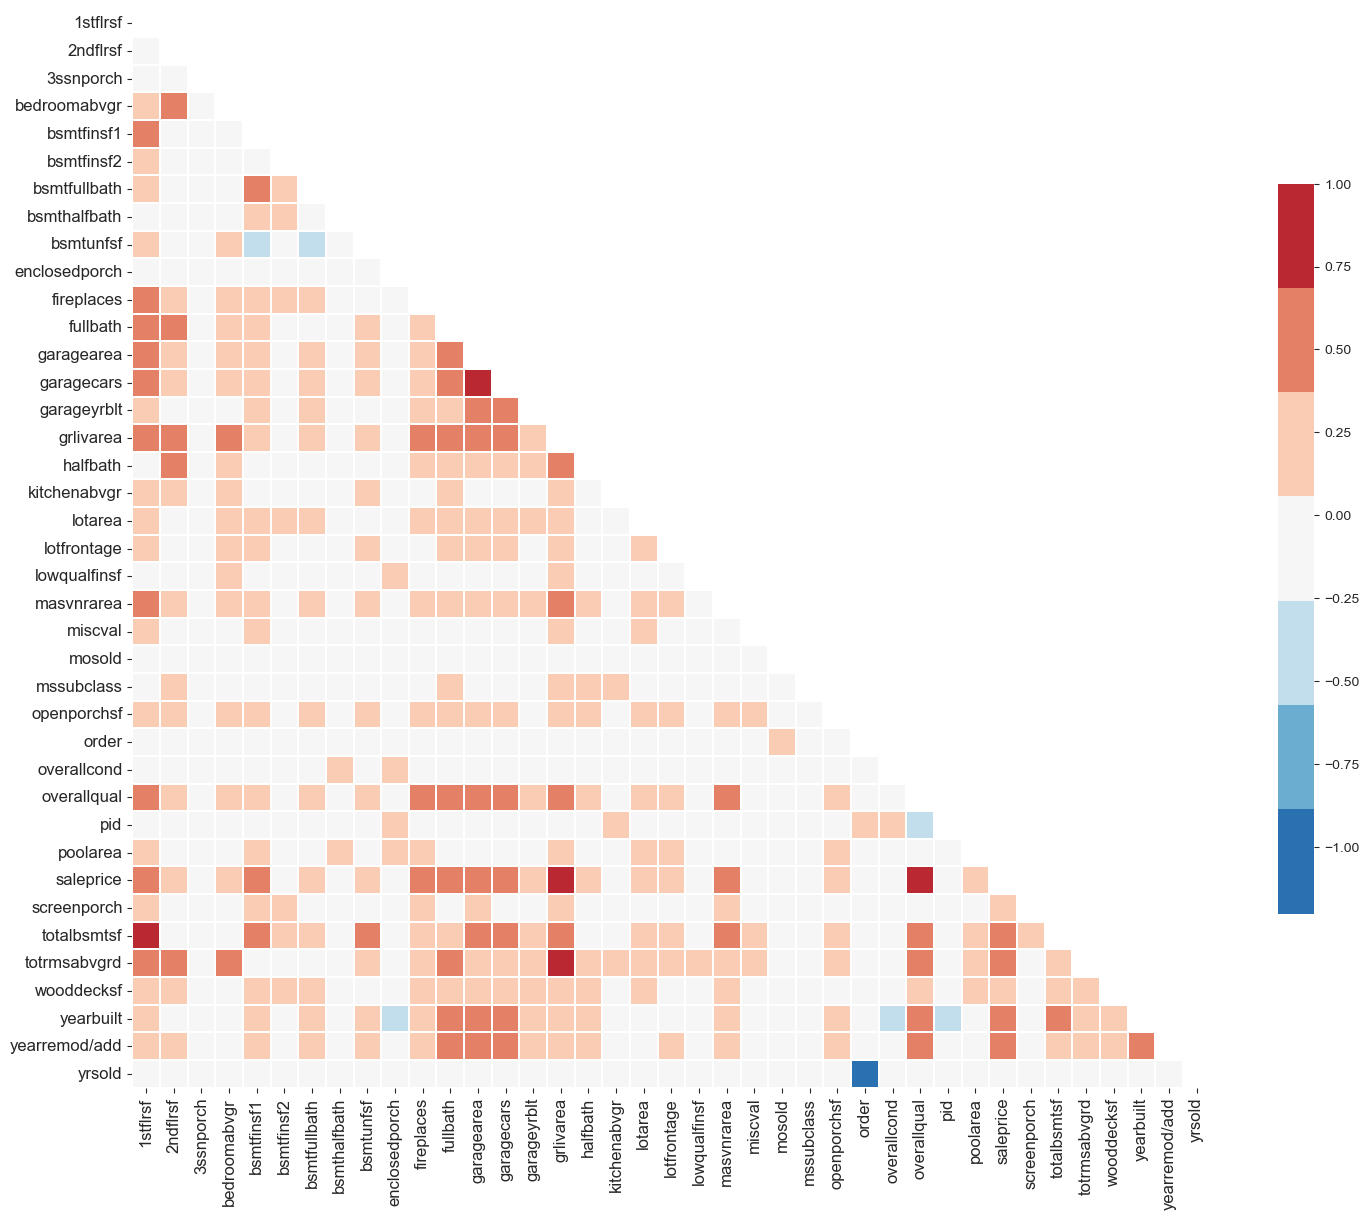

In [102]:
# Ensure only numeric columns are included in the correlation calculation
train_copy_numeric = train_copy.select_dtypes(include=[np.number])

# Handle any NaN values (optional, depending on your use case)
train_copy_numeric = train_copy_numeric.dropna()  # Drop rows with NaN values (you can also fill NaNs if needed)

# Order columns by name
train_copy_numeric = train_copy_numeric[train_copy_numeric.columns.sort_values()]

# Plot heatmap
mask = np.zeros_like(train_copy_numeric.corr(), dtype=bool)  # Replaced np.bool with bool
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train_copy_numeric.corr(),
            mask=mask,
            square=True,
            vmin=-1.2,
            vmax=1,
            linewidth=0.1,
            cbar_kws={'shrink': 0.5},
            cmap=sns.color_palette("RdBu_r", 7))
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

In [ ]:
"""The correlation heatmap below shows the ten features that have the highest correlation coefficient with saleprice. 
These include categorical features as well as the features were first dummy-encoded. 
There are no negative correlation coefficients among these, meaning everything is positively correlated with saleprice. 
overallqual has the highest correlation with saleprice."""

In [103]:
#From the EDA, one can already get a basic idea of the features that could most affect house price, based on the relationship with saleprice revealed in the correlation heatmap. 
#Area (e.g. (grlivearea, garagearea, totalbsmtsf) is likely to be one of the most important factor affecting house price. 
#The age of the house (yearbuilt) is also likely to be important.
#Top ten features that affect the saleprice are likely to be: fullbath, yearremod/add,yearbuilt, 1stflrsf, totalbsmtsf, garagecars, garage area, grlivarea and overall quality.

In [104]:
#Keeeping only columns that are highly correlated feature to saleprice for further calcualtions and dropping the rest seemingly unrelated features
train.drop(train.columns.difference([
    'yearremod/add', 'fullbath', 'yearbuilt', '1stflrsf', 
    'totalbsmtsf', 'garagecars', 'garagearea', 'grlivarea', 'overallqual','saleprice'
]), axis=1, inplace=True)

In [128]:
train

,overallqual,yearbuilt,yearremod/add,totalbsmtsf,1stflrsf,grlivarea,fullbath,garagecars,garagearea,saleprice
0,6,1960,1960,1080.0,1656,1656,1,2.0,528.0,215000
1,5,1961,1961,882.0,896,896,1,1.0,730.0,105000
2,6,1958,1958,1329.0,1329,1329,1,1.0,312.0,172000
3,7,1968,1968,2110.0,2110,2110,2,2.0,522.0,244000
4,5,1997,1998,928.0,928,1629,2,2.0,482.0,189900
...,...,...,...,...,...,...,...,...,...,...
2925,6,1984,1984,1003.0,1003,1003,1,2.0,588.0,142500
2926,5,1983,1983,864.0,902,902,1,2.0,484.0,131000
2927,5,1992,1992,912.0,970,970,1,0.0,0.0,132000
2928,5,1974,1975,1389.0,1389,1389,1,2.0,418.0,170000


In [106]:
#checking for null values
print(train.isnull().sum())

overallqual      0
yearbuilt        0
yearremod/add    0
totalbsmtsf      1
1stflrsf         0
grlivarea        0
fullbath         0
garagecars       1
garagearea       1
saleprice        0
dtype: int64


In [107]:
#Dropping rows with null values
train.dropna(inplace=True)

In [108]:
print(train.isnull().sum())

overallqual      0
yearbuilt        0
yearremod/add    0
totalbsmtsf      0
1stflrsf         0
grlivarea        0
fullbath         0
garagecars       0
garagearea       0
saleprice        0
dtype: int64


In [109]:
train.shape

(2928, 10)

In [110]:
# Define the features (X) and target variable (y)
X = train[['yearremod/add', 'fullbath', 'yearbuilt', '1stflrsf', 
           'totalbsmtsf', 'garagecars', 'garagearea', 'grlivarea', 'overallqual']]

y = train['saleprice']

In [114]:
#split the dataset into training and testing sets
#test_size=0.2. 20% of the data will be used for testing
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)

In [117]:
#Model training
#Initialize the Linear Regression model
model=LinearRegression()
#Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [119]:
#Model evaluation
#make predictions on the test data
y_pred=model.predict(X_test)

In [121]:
#calculate evaluation metrics
mse=root_mean_squared_error(y_test,y_pred) #mean squared error
r2=r2_score(y_test, y_pred) #R-squared score

In [124]:
#Print evaluation metrics
print(f"Mean squared error: {mse:.2f}")
print(f"R-squared score: {r2:.2f}")

Mean squared error: 38268.33
R-squared score: 0.80


In [ ]:
"""The R-squared score is 0.80, which means that 80% of the variability in the target variable (e.g., house price) can be explained by the model. 
This indicates that the model has a good fit and does a strong job in explaining the variation in the data.
Overall, the model seems to perform well, with a high R-squared value indicating strong predictive power"""

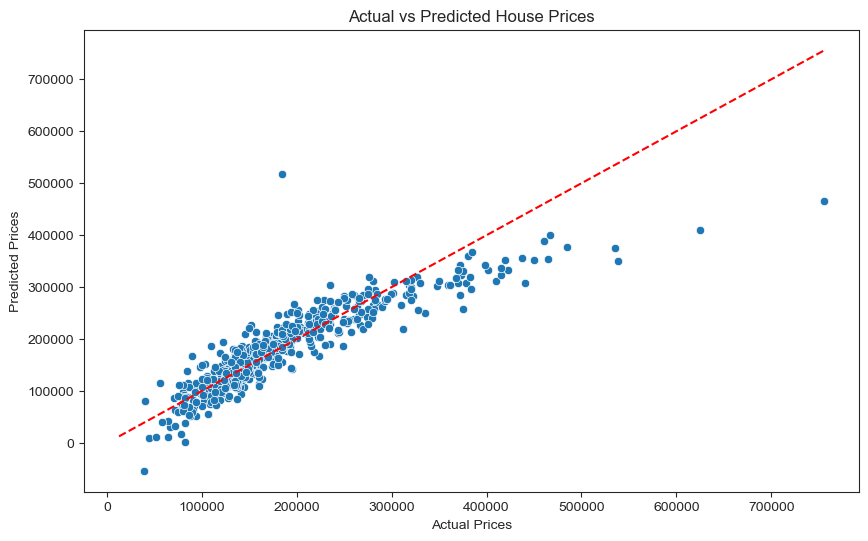

In [126]:
#Visualize the results
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred) #scatterplot of actual vs predicted prices
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.plot([y.min(), y.max()], [y.min(), y.max()],'--', color='red') #diagonal line for perfect predictions
plt.show()

In [ ]:
#showcasing explored and cleaned data

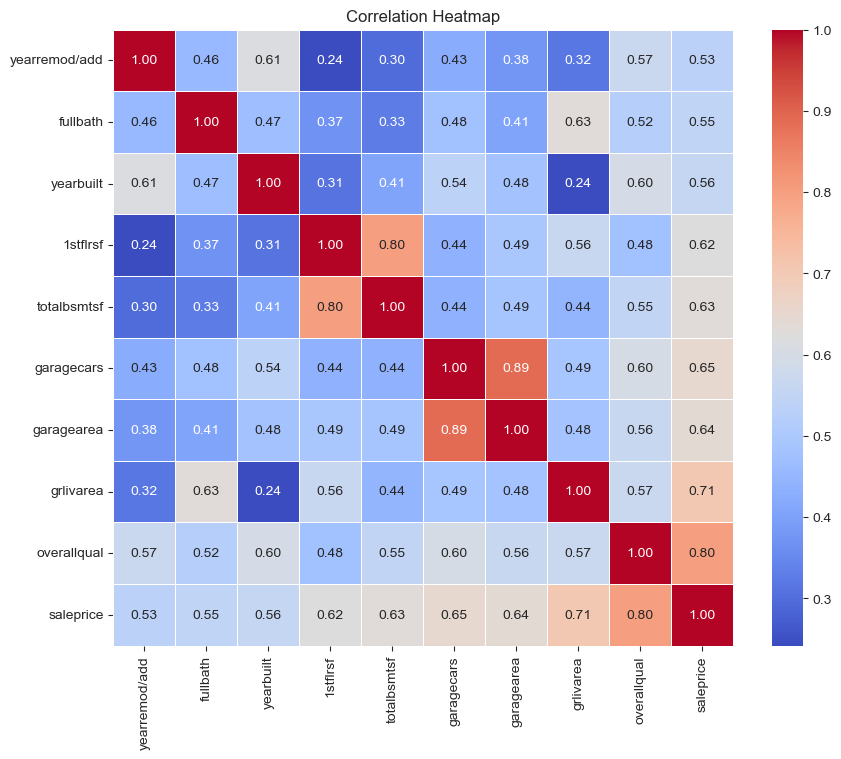

In [129]:
# Combine X and y into a single DataFrame
data = X.copy()
data['saleprice'] = y

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size if necessary
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the plot
plt.title('Correlation Heatmap')
plt.show()

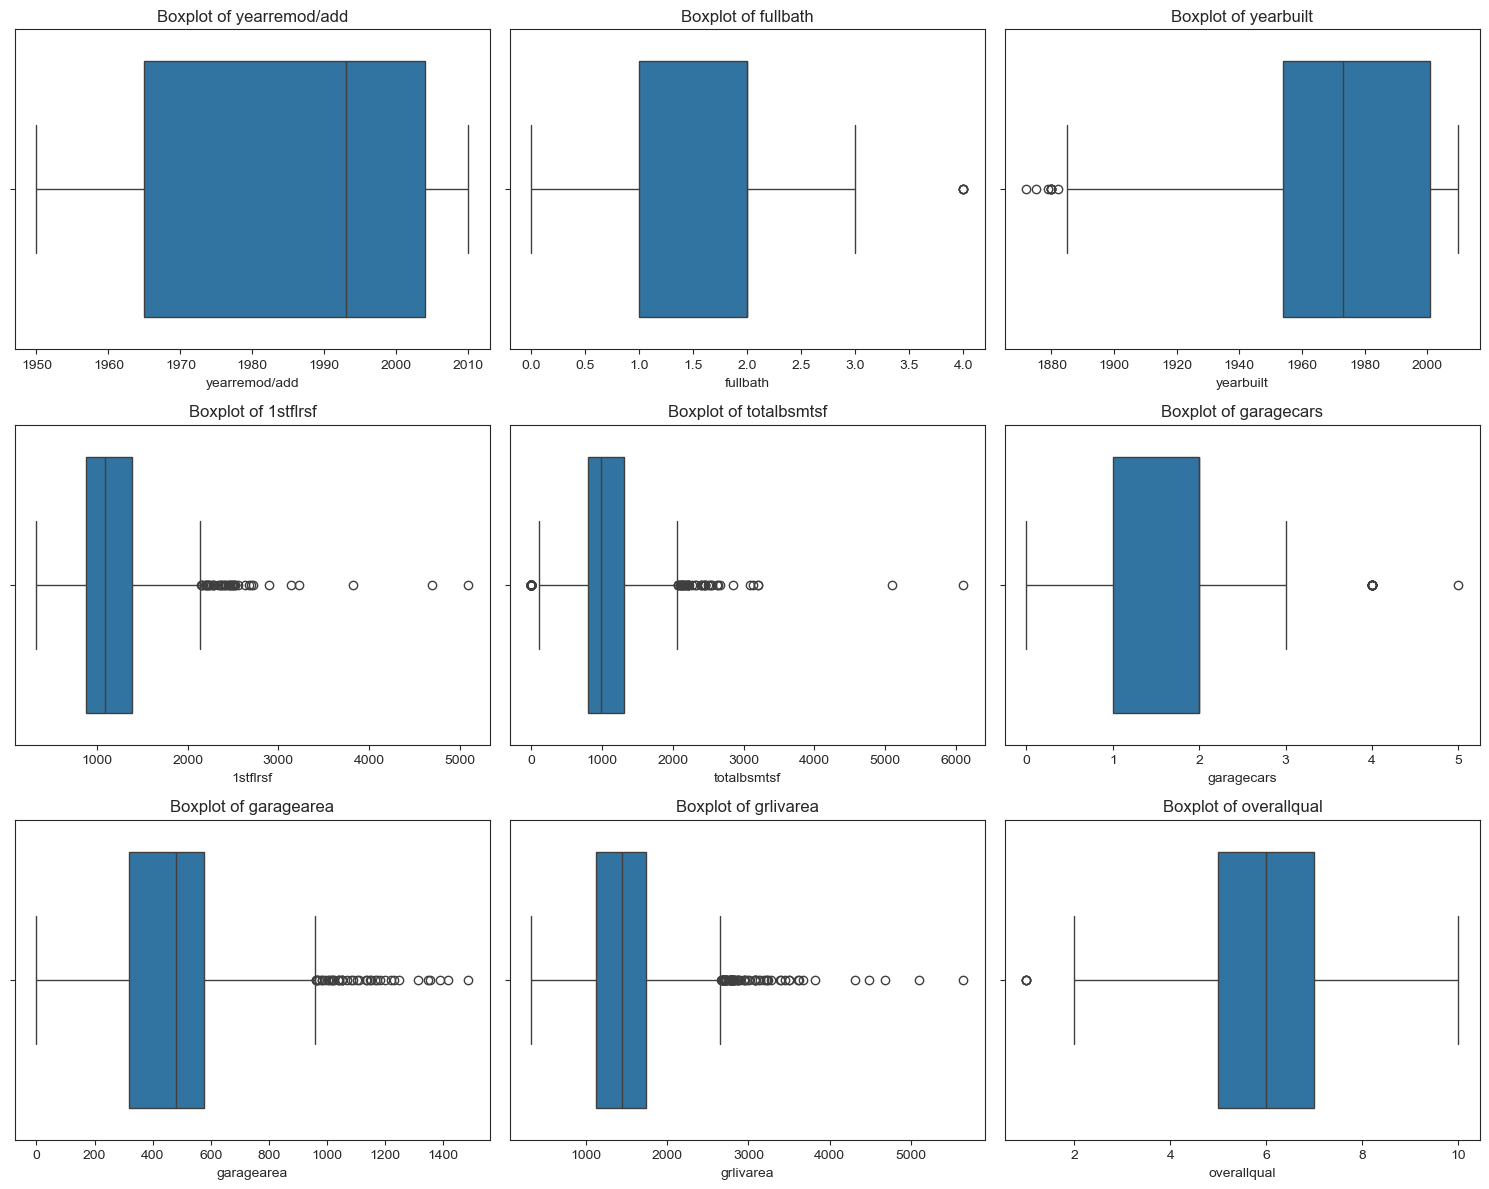

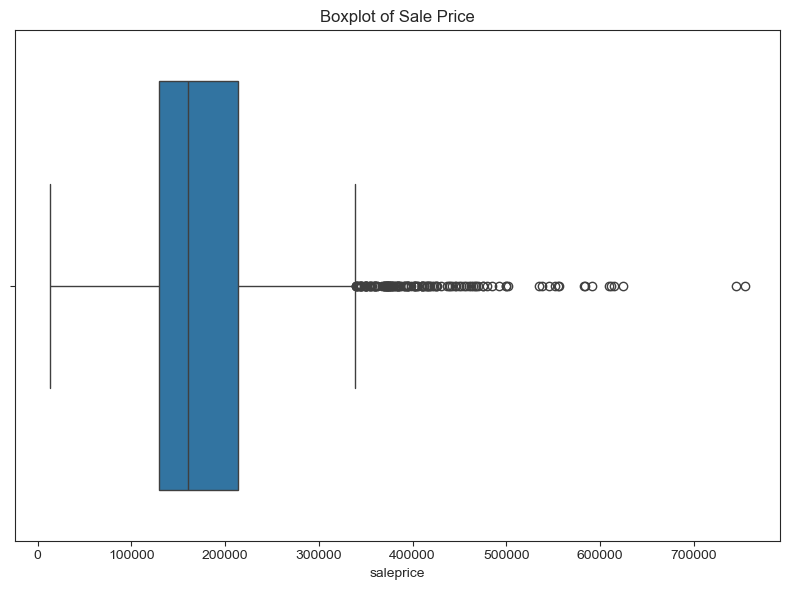

In [131]:
# Create a boxplot for each feature in X
plt.figure(figsize=(15, 12))  # Adjust the figure size if necessary

# Loop through the columns in X and create a boxplot for each
for i, col in enumerate(X.columns, 1):
    plt.subplot(3, 3, i)  # Creating a grid of subplots (3 rows and 3 columns)
    sns.boxplot(x=train[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

# Create a boxplot for the target variable (saleprice)
plt.figure(figsize=(8, 6))
sns.boxplot(x=train['saleprice'])
plt.title('Boxplot of Sale Price')
plt.tight_layout()

# Display the plots
plt.show()

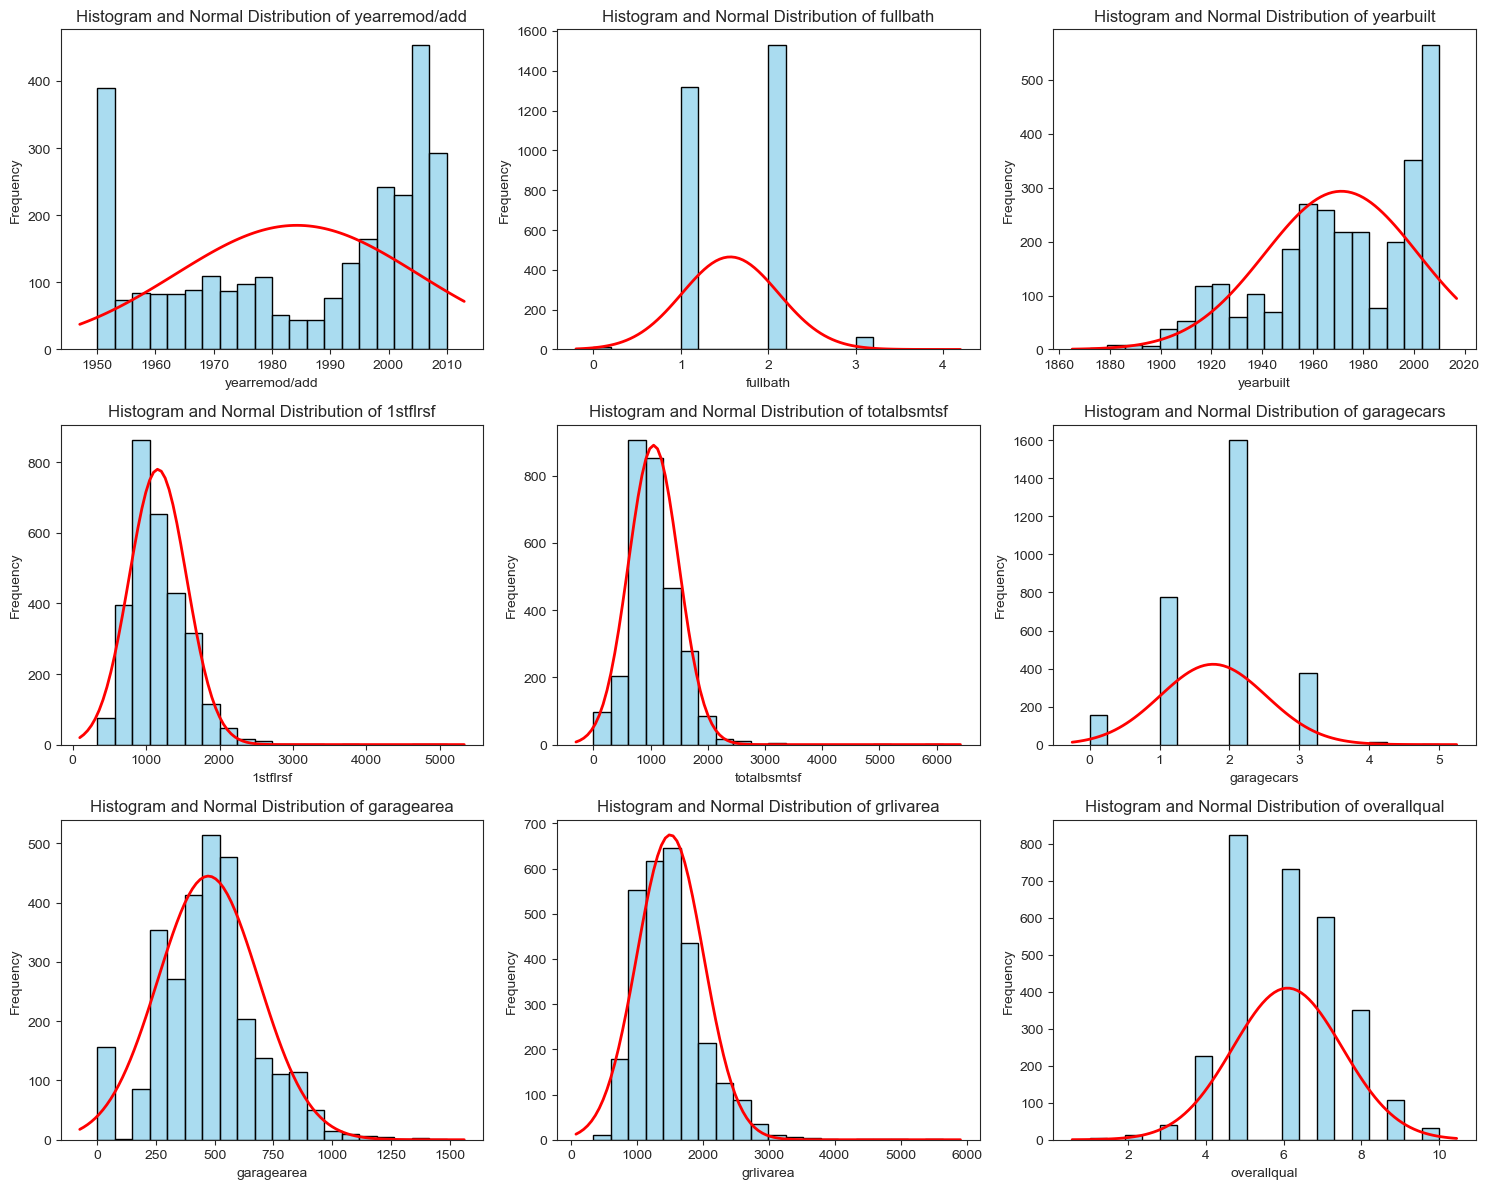

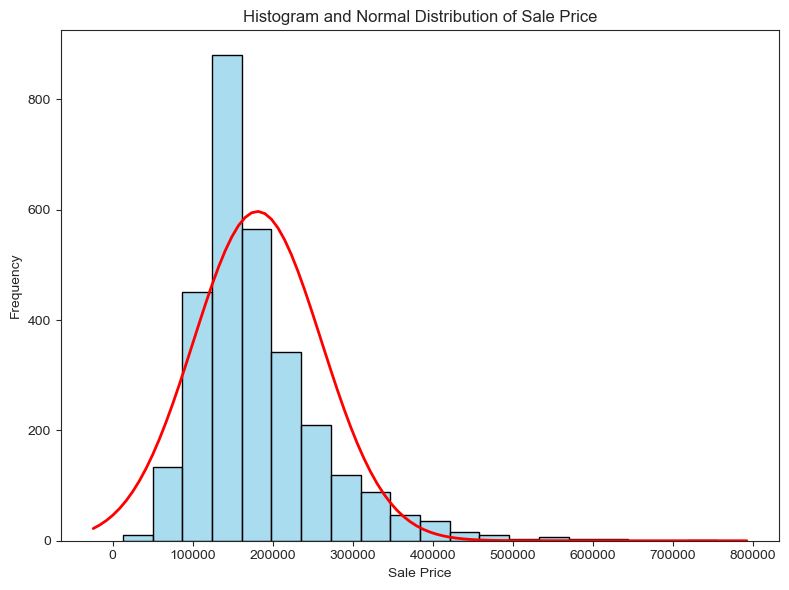

In [133]:
# Create histograms with normal distribution curve for each feature in X
plt.figure(figsize=(15, 12))  # Adjust the figure size if necessary

# Loop through the columns in X and create a histogram with a normal distribution line
for i, col in enumerate(X.columns, 1):
    plt.subplot(3, 3, i)  # Creating a grid of subplots (3 rows and 3 columns)
    # Plot the histogram
    sns.histplot(train[col], kde=False, bins=20, color='skyblue', edgecolor='k', alpha=0.7)
    
    # Fit a normal distribution to the data and plot the normal curve
    mu, std = stats.norm.fit(train[col])  # Fit normal distribution
    xmin, xmax = plt.xlim()  # Get the current x-axis limits
    x = np.linspace(xmin, xmax, 100)  # Generate a range of x values
    p = stats.norm.pdf(x, mu, std)  # Calculate the probability density function
    plt.plot(x, p * len(train[col]) * (xmax - xmin) / 20, 'r-', lw=2)  # Scale the normal curve to the histogram
    
    # Title and labels
    plt.title(f'Histogram and Normal Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

# Create a histogram with normal distribution line for the target variable (saleprice)
plt.figure(figsize=(8, 6))
sns.histplot(train['saleprice'], kde=False, bins=20, color='skyblue', edgecolor='k', alpha=0.7)

# Fit normal distribution to the target variable (saleprice)
mu, std = stats.norm.fit(train['saleprice'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p * len(train['saleprice']) * (xmax - xmin) / 20, 'r-', lw=2)

plt.title('Histogram and Normal Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.tight_layout()

# Display the plots
plt.show()

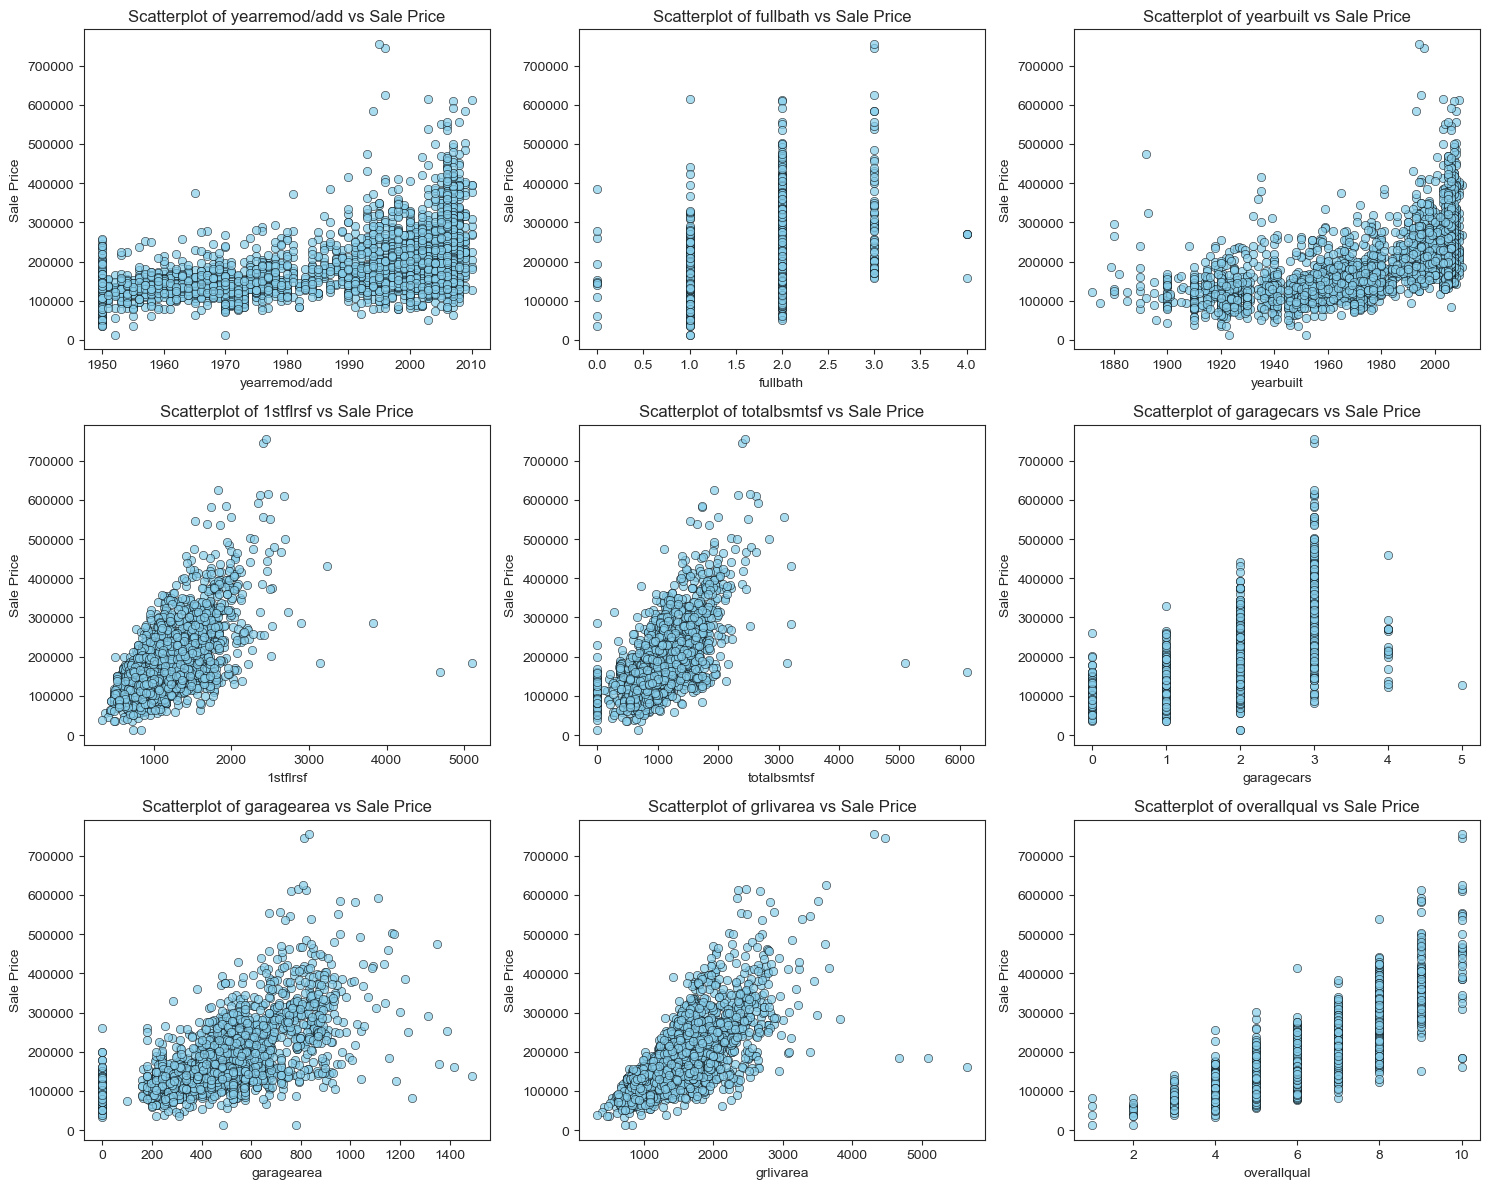

In [134]:
# Create scatterplots for each feature in X against saleprice
plt.figure(figsize=(15, 12))  # Adjust the figure size if necessary

# Loop through the columns in X and create a scatterplot for each against saleprice
for i, col in enumerate(X.columns, 1):
    plt.subplot(3, 3, i)  # Creating a grid of subplots (3 rows and 3 columns)
    sns.scatterplot(x=train[col], y=train['saleprice'], color='skyblue', edgecolor='k', alpha=0.7)
    plt.title(f'Scatterplot of {col} vs Sale Price')
    plt.xlabel(col)
    plt.ylabel('Sale Price')
    plt.tight_layout()

# Display the plots
plt.show()

In [ ]:
"""The most significant factors influencing a house's selling price include its square footage, condition, age, and location.
For a buyer, the model can help determine which features they can afford, such as the size of a house they could purchase within their budget.
Properties in commercial zones and two-story houses built in 1946 or later make for less advisable properties for investment."""